In [1]:
#imorting the libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# importing  data
loan_record=pd.read_csv('loan.csv',low_memory=False)

In [3]:
# Dropping all columns having null values
loan_record_new=loan_record.dropna(axis=1,how='all')
loan_record.shape

(39717, 111)

In [4]:
#Remove columns with  one unique values
loan_record_new= loan_record_new.loc[:,loan_record_new.nunique()!=1]
loan_record_new.shape

(39717, 48)

In [5]:
# Drop columns with > 50% null values
loan_record_new=loan_record_new.loc[:,round(loan_record_new.isnull().sum()/len(loan_record_new)*100,2)<50]
loan_record_new.shape

(39717, 45)

In [6]:
drop_columns=['id','member_id','loan_amnt','funded_amnt_inv','emp_title','earliest_cr_line','url','total_acc','open_acc','desc','title','zip_code','issue_d','sub_grade','last_credit_pull_d','last_pymnt_d']
loan_record_new=loan_record_new.drop(drop_columns,axis=1)
loan_record_new.dtypes

drop_columns1=['total_rec_int','total_rec_late_fee','recoveries','collection_recovery_fee','last_pymnt_amnt']
loan_record_new=loan_record_new.drop(drop_columns1,axis=1)

In [7]:
# As we only want to find out potential defaults, we should remove 'current' from loan status
loan_record_new=loan_record_new[loan_record_new.loan_status !='Current']
loan_record_new=loan_record_new.loc[:,loan_record_new.nunique()!=1]

In [8]:
loan_record_new.dtypes

funded_amnt               int64
term                     object
int_rate                 object
installment             float64
grade                    object
emp_length               object
home_ownership           object
annual_inc              float64
verification_status      object
loan_status              object
purpose                  object
addr_state               object
dti                     float64
delinq_2yrs               int64
inq_last_6mths            int64
pub_rec                   int64
revol_bal                 int64
revol_util               object
total_pymnt             float64
total_pymnt_inv         float64
total_rec_prncp         float64
pub_rec_bankruptcies    float64
dtype: object

In [9]:
# Converting revol_util and int_rate into a numeric type
loan_record_new.revol_util=loan_record_new.revol_util.str.rstrip('%').astype('float')
loan_record_new.int_rate=loan_record_new.int_rate.str.rstrip('%').astype('float')

# Creating a profit and loss column
loan_record_new['PnL']=round((loan_record_new['total_pymnt']-loan_record_new['funded_amnt'])*100/loan_record_new['funded_amnt'],2)

# Creating a column whihc is ratio of funded amount and annual income
loan_record_new['loan_inc_ratio']=round(loan_record_new.funded_amnt*100/loan_record_new.annual_inc,0)

print(loan_record_new.groupby(['grade'])['PnL'].median())
print(loan_record_new[(loan_record_new['inq_last_6mths']<3)].groupby('grade')['PnL'].median())
print(loan_record_new[(loan_record_new['grade']!='G')|(loan_record_new['home_ownership']!='OWN')].groupby('grade')['PnL'].median())
print(loan_record_new[(loan_record_new['grade']!='G')|(loan_record_new['home_ownership']!='OWN')].groupby('grade')['PnL'].median())
print(loan_record_new[(loan_record_new['grade']!='G')|(loan_record_new['purpose']!='medical')].groupby('grade')['PnL'].median())
print(loan_record_new[(loan_record_new['grade']!='G')|(loan_record_new['purpose']!='renewable_energy')].groupby('grade')['PnL'].median())
print(loan_record_new[(loan_record_new['grade']!='G')|(loan_record_new['purpose']!='small_business')].groupby('grade')['PnL'].median())
print(loan_record_new[(loan_record_new['grade']!='G')|((loan_record_new['home_ownership']!='OWN')&(~loan_record_new['purpose'].isin(['small_business','medical','renewable_energy'])))].groupby('grade')['PnL'].median())
#loan_record_new[(loan_record_new['grade']=='G')&(loan_record_new['emp_length']=='na')][['grade','emp_length']]
#loan_record_new.groupby(['emp_length','grade'])['term'].count()
print(loan_record_new[(loan_record_new['grade']=='G')&(loan_record_new['emp_length']=='< 1 year')]['purpose'].value_counts())


grade
A    10.28
B    16.16
C    20.61
D    23.23
E    26.56
F    28.34
G    29.24
Name: PnL, dtype: float64
grade
A    10.28
B    16.22
C    20.63
D    23.50
E    26.57
F    28.38
G    31.38
Name: PnL, dtype: float64
grade
A    10.280
B    16.160
C    20.610
D    23.230
E    26.560
F    28.340
G    29.825
Name: PnL, dtype: float64
grade
A    10.280
B    16.160
C    20.610
D    23.230
E    26.560
F    28.340
G    29.825
Name: PnL, dtype: float64
grade
A    10.28
B    16.16
C    20.61
D    23.23
E    26.56
F    28.34
G    29.71
Name: PnL, dtype: float64
grade
A    10.28
B    16.16
C    20.61
D    23.23
E    26.56
F    28.34
G    29.64
Name: PnL, dtype: float64
grade
A    10.280
B    16.160
C    20.610
D    23.230
E    26.560
F    28.340
G    31.405
Name: PnL, dtype: float64
grade
A    10.28
B    16.16
C    20.61
D    23.23
E    26.56
F    28.34
G    33.45
Name: PnL, dtype: float64
debt_consolidation    17
credit_card            6
small_business         6
educational            1
car    

In [10]:
print("% of data points left",round(loan_record_new.size/loan_record.size*100,2))
print("% defaults in the remaining data set:",round(sum(loan_record_new.loan_status=='Charged Off')*100/len(loan_record_new),1))

% of data points left 21.0
% defaults in the remaining data set: 14.6


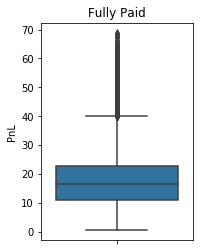

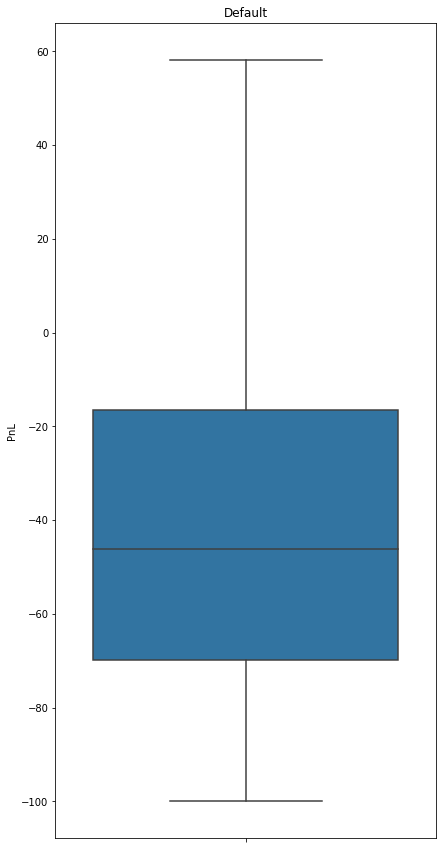

In [11]:
#Relationship of Funded Amount with defaults

plt.subplot(1,2,2)
plt.title('Fully Paid')
sns.boxplot(y=loan_record_new[loan_record_new.loan_status=='Fully Paid'].PnL)
plt.show()


plt.figure(figsize=(15,15))

plt.subplot(1,2,1)
plt.title('Default')
sns.boxplot(y=loan_record_new[loan_record_new.loan_status=='Charged Off'].PnL)




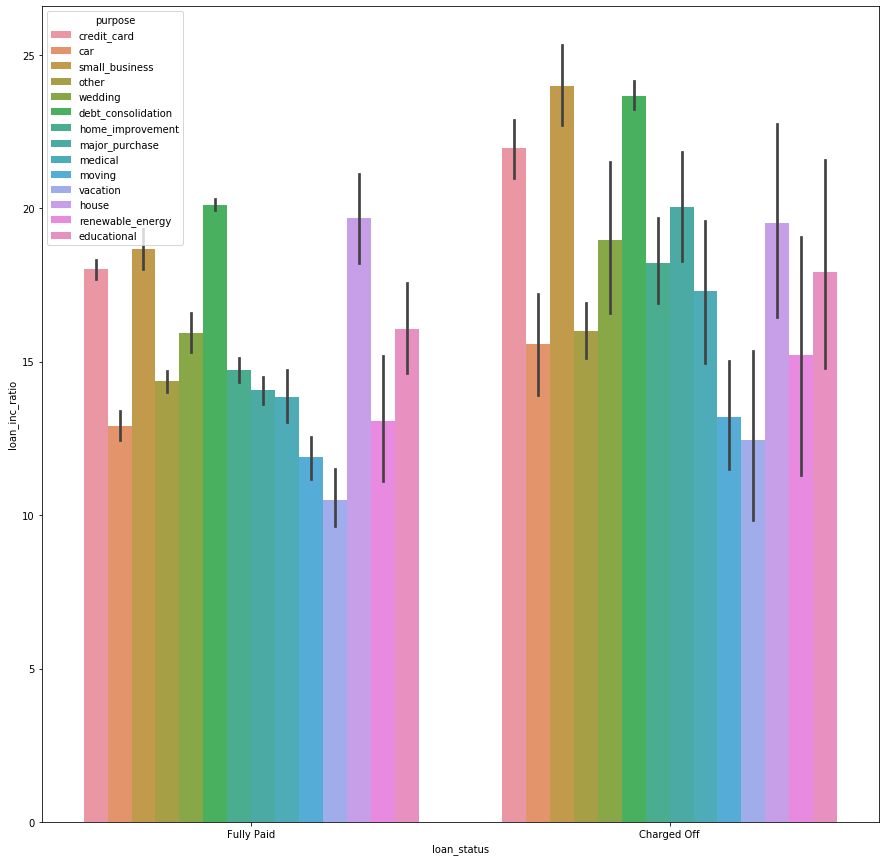

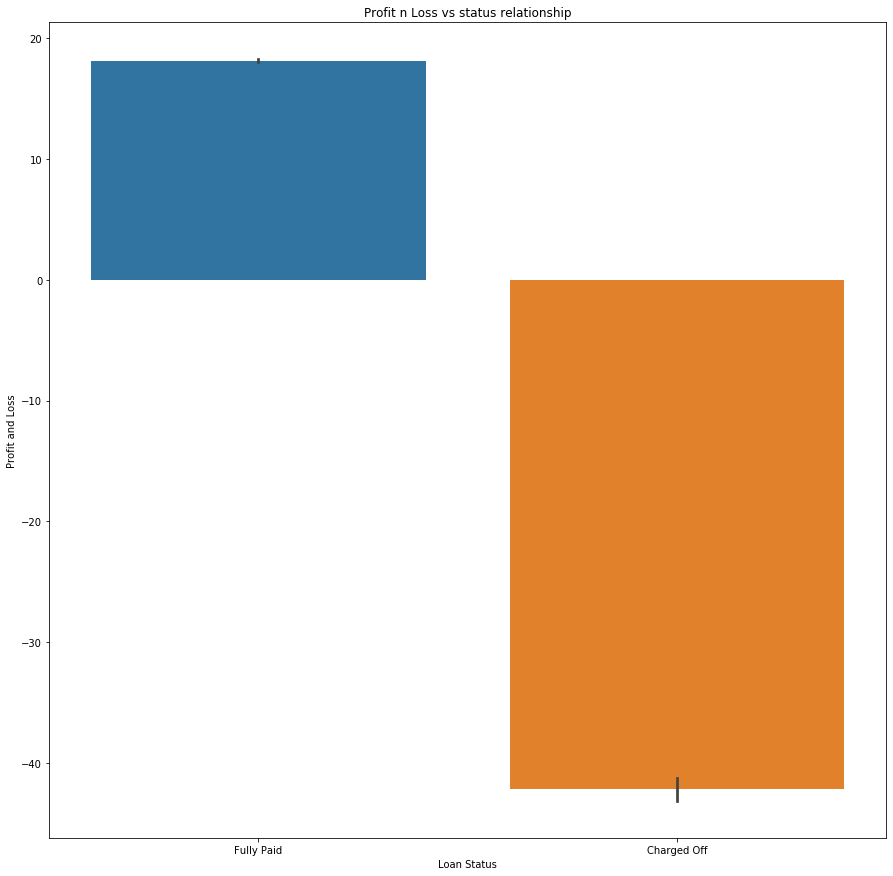

In [12]:
# Relationship of default with funded amount with a barplot

plt.figure(figsize=(15,15))

sns.barplot(x='loan_status',y='loan_inc_ratio',hue='purpose',data=loan_record_new)

plt.show()




plt.figure(figsize=(15,15))

sns.barplot(x='loan_status',y='PnL',data=loan_record_new)
plt.xlabel("Loan Status")
plt.ylabel("Profit and Loss")

plt.title("Profit n Loss vs status relationship")

plt.show()




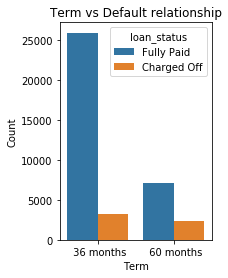

Text(0.5, 1.0, 'Profit and Loss vs term relationship')

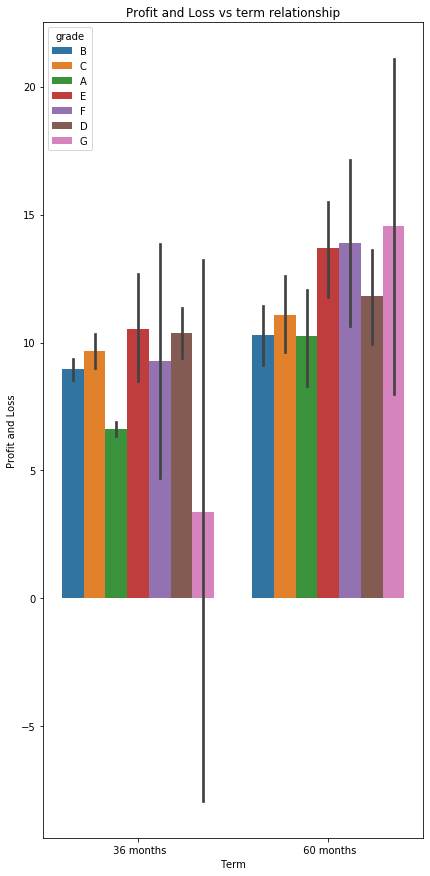

In [13]:
# Relationship of default with term with a barplot

plt.subplot(1,2,2)
sns.countplot('term',hue='loan_status',data=loan_record_new)
plt.xlabel("Term")
plt.ylabel("Count")
plt.title("Term vs Default relationship")
plt.show()



plt.figure(figsize=(15,15))

plt.subplot(1,2,1)
sns.barplot(x='term',y='PnL',data=loan_record_new,hue='grade')
plt.xlabel("Term")
plt.ylabel("Profit and Loss")

plt.title("Profit and Loss vs term relationship")





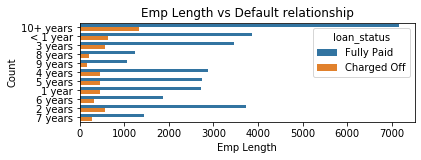

Text(0.5, 1.0, 'Loan amount vs Emp Length relationship')

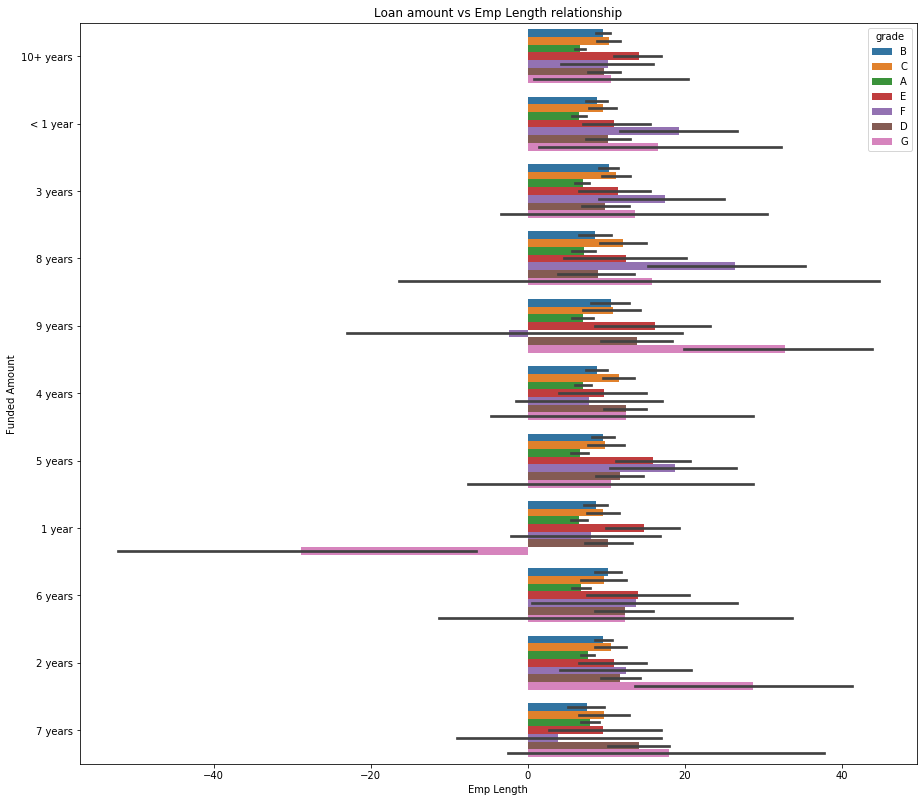

In [14]:
# Relationship of default with term with a barplot

plt.subplot(2,1,2)
sns.countplot(y='emp_length',hue='loan_status',data=loan_record_new)
plt.xlabel("Emp Length")
plt.ylabel("Count")
plt.title("Emp Length vs Default relationship")
plt.show()



plt.figure(figsize=(15,30))

plt.subplot(2,1,1)
sns.barplot(y='emp_length',x='PnL',data=loan_record_new,hue='grade')
plt.xlabel("Emp Length")
plt.ylabel("Funded Amount")

plt.title("Loan amount vs Emp Length relationship")




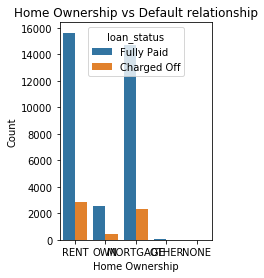

Text(0.5, 1.0, 'Funded amount vs Home Ownership relationship')

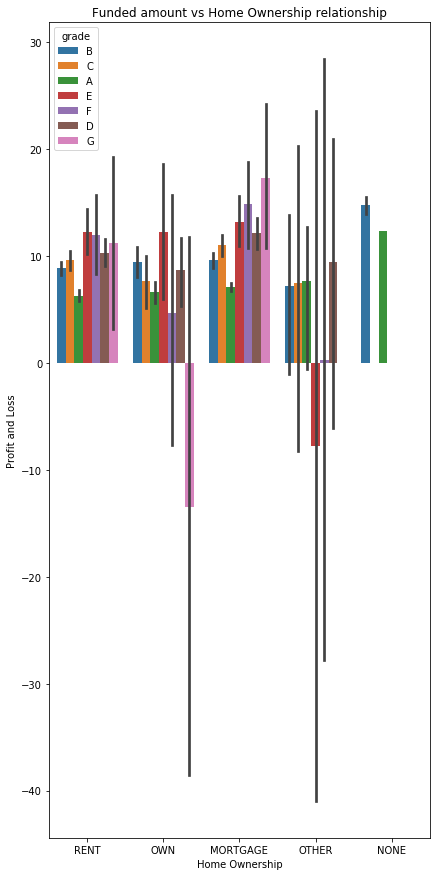

In [15]:

plt.subplot(1,2,2)
sns.countplot(x='home_ownership',hue='loan_status',data=loan_record_new)
plt.xlabel("Home Ownership")
plt.ylabel("Count")
plt.title("Home Ownership vs Default relationship")
plt.show()




plt.figure(figsize=(15,15))

plt.subplot(1,2,1)
sns.barplot(x='home_ownership',y='PnL',data=loan_record_new,hue='grade')
plt.xlabel("Home Ownership")
plt.ylabel("Profit and Loss")

plt.title("Funded amount vs Home Ownership relationship")




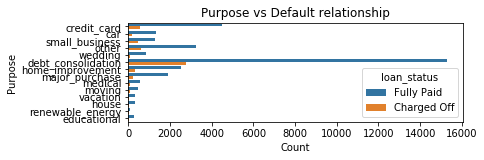

Text(0.5, 1.0, 'Funded amount vs Purpose relationship')

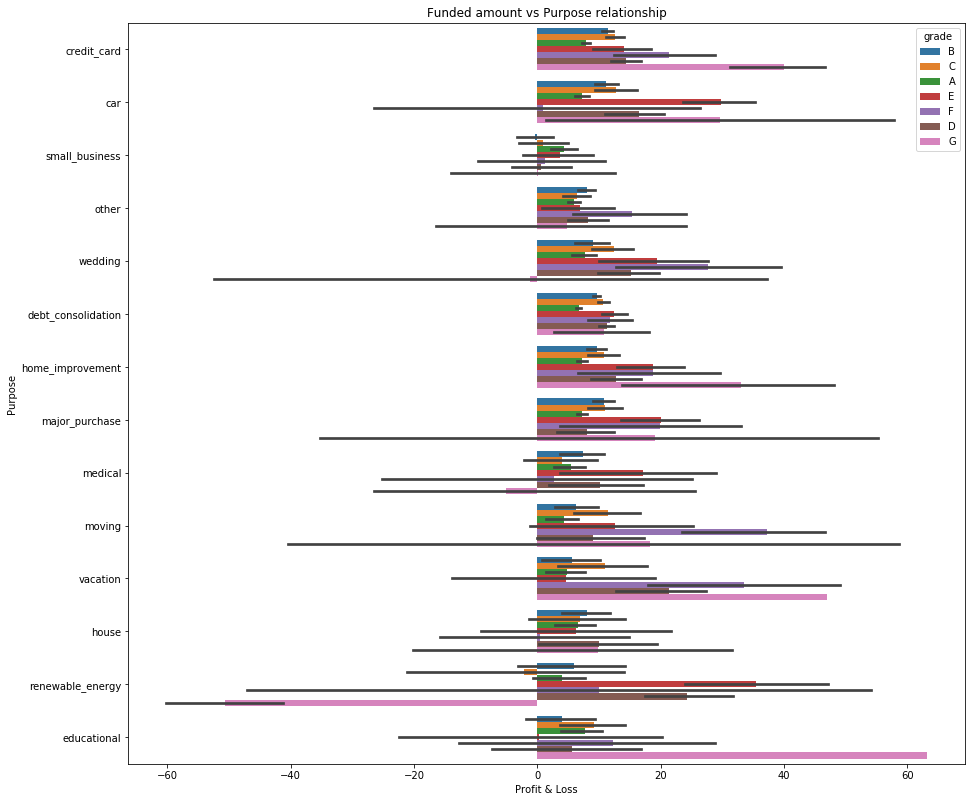

In [17]:
plt.subplot(2,1,2)
sns.countplot(y='purpose',hue='loan_status',data=loan_record_new)
plt.ylabel("Purpose")
plt.xlabel("Count")
plt.title("Purpose vs Default relationship")
plt.show()


plt.figure(figsize=(15,30))

plt.subplot(2,1,1)
sns.barplot(y='purpose',x='PnL',data=loan_record_new,hue='grade')
plt.ylabel("Purpose")
plt.xlabel("Profit & Loss")

plt.title("Funded amount vs Purpose relationship")




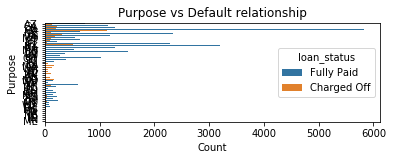

Text(0.5, 1.0, 'Funded amount vs Purpose relationship')

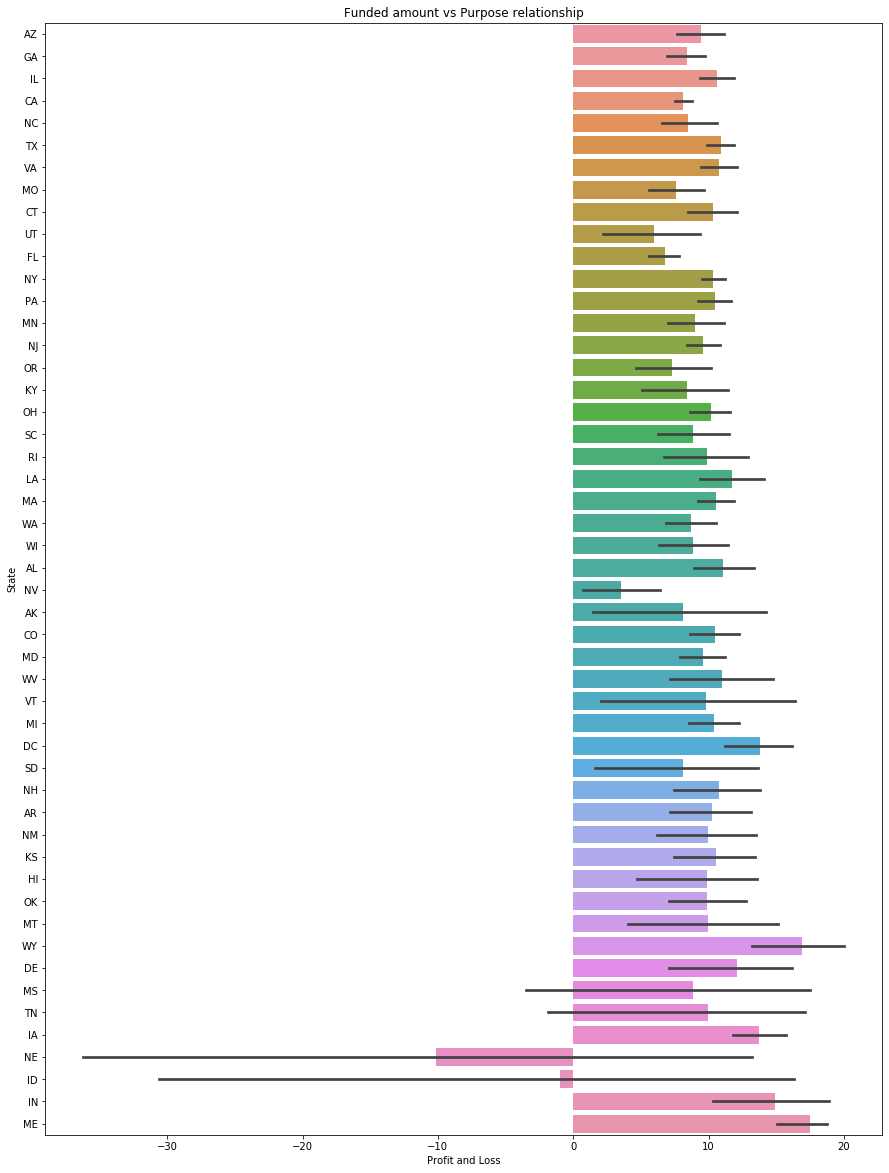

In [18]:
plt.subplot(2,1,2)
sns.countplot(y='addr_state',hue='loan_status',data=loan_record_new)
plt.ylabel("Purpose")
plt.xlabel("Count")
plt.title("Purpose vs Default relationship")
plt.show()




plt.figure(figsize=(15,45))

plt.subplot(2,1,1)
sns.barplot(y='addr_state',x='PnL',data=loan_record_new)
plt.ylabel("State")
plt.xlabel("Profit and Loss")

plt.title("Funded amount vs Purpose relationship")




<Figure size 1080x1080 with 0 Axes>

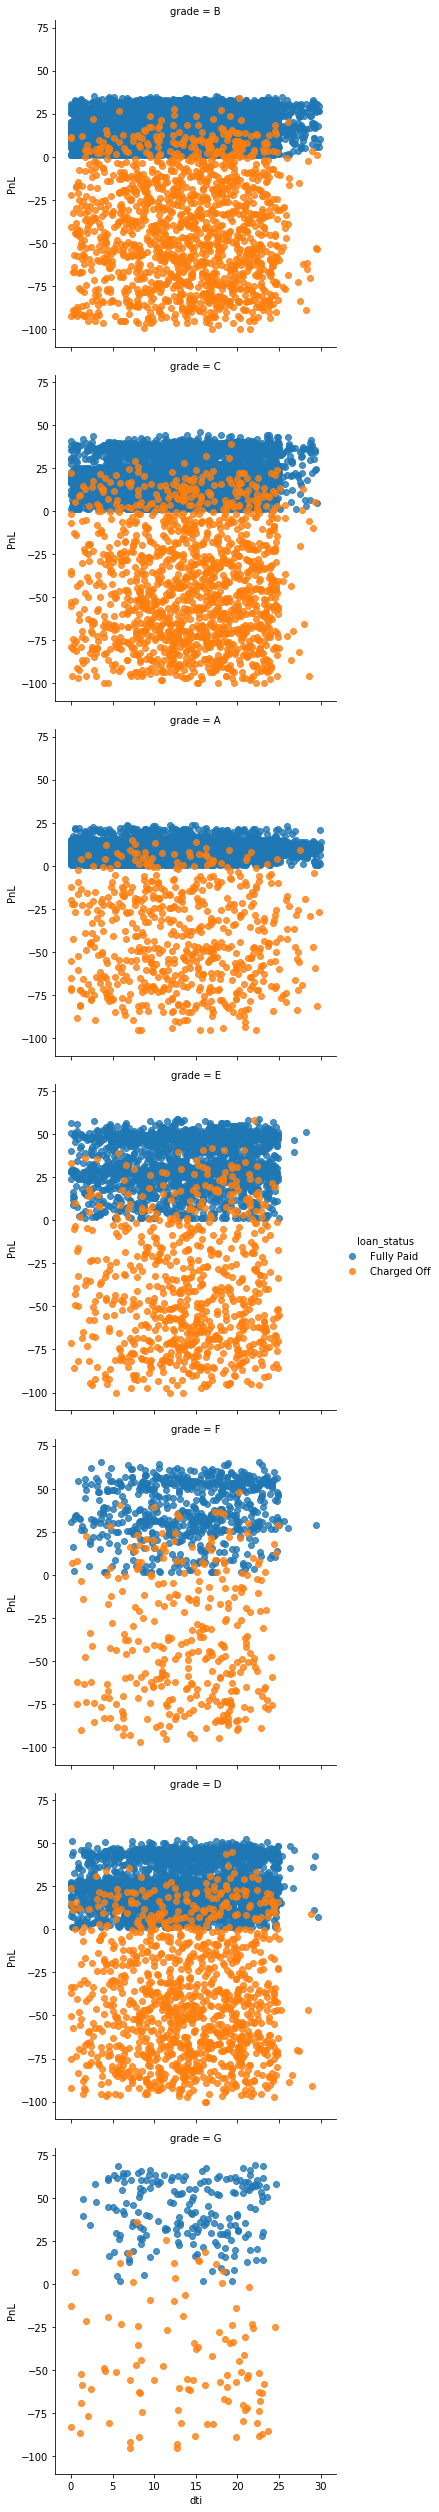

In [19]:
#Understanding influence of loan amount and DTI on profitability of individual loans


plt.figure(figsize=(15,15))

sns.lmplot(x='dti',y='PnL',row='grade',hue='loan_status',fit_reg=False,data=loan_record_new)

plt.show()

<Figure size 1080x1080 with 0 Axes>

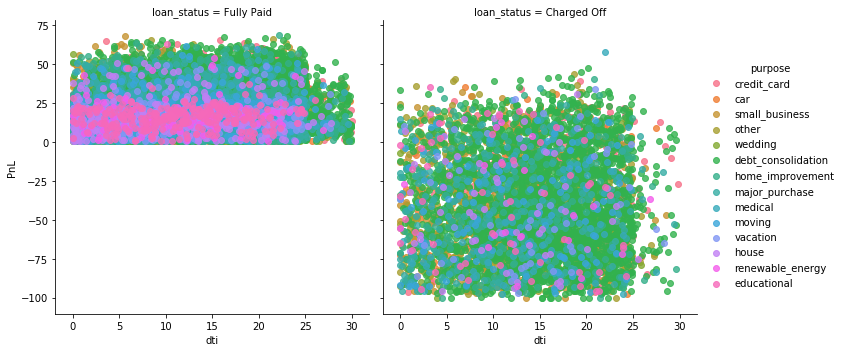

In [20]:
plt.figure(figsize=(15,15))

sns.lmplot(x='dti',y='PnL',col='loan_status',hue='purpose',fit_reg=False,data=loan_record_new)

plt.show()

<Figure size 1080x1080 with 0 Axes>

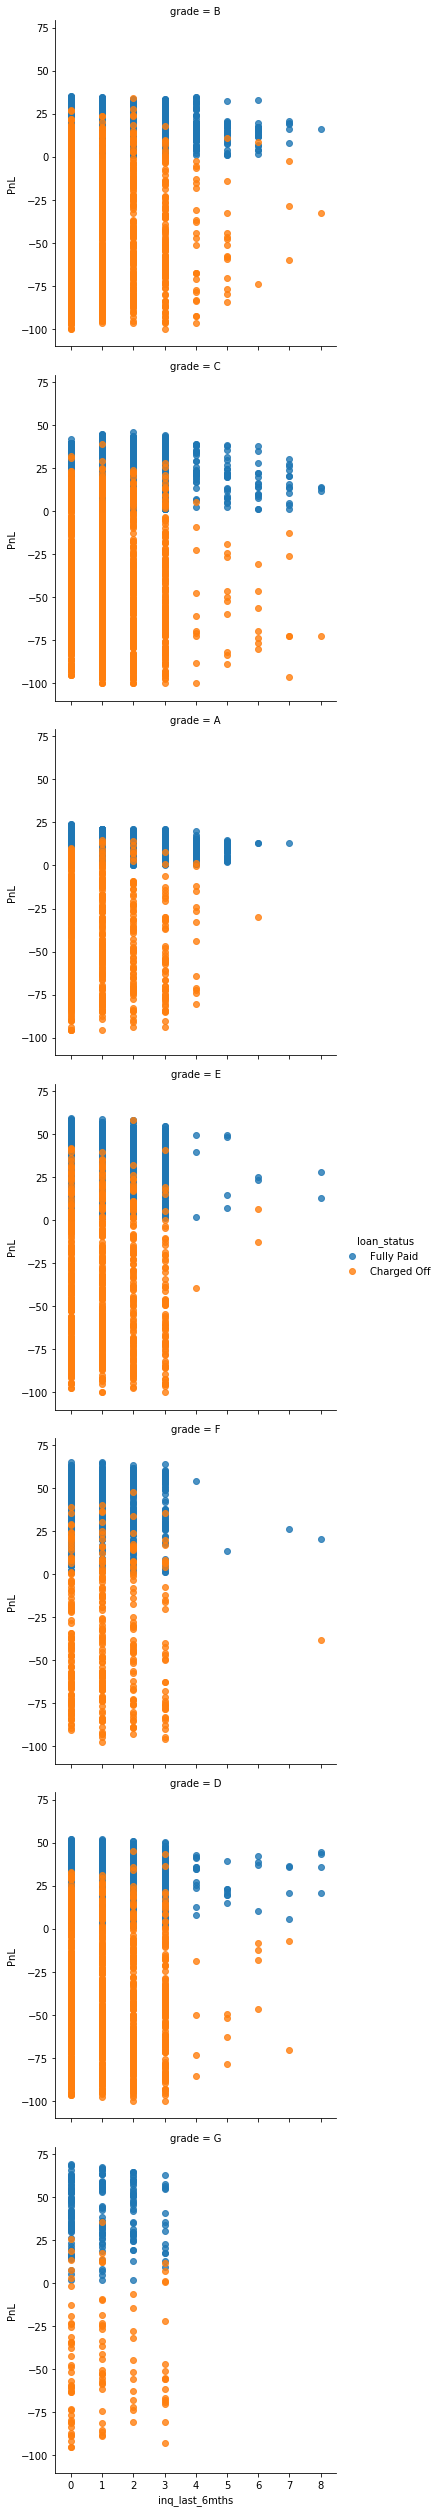

In [21]:
plt.figure(figsize=(15,15))

sns.lmplot(x='inq_last_6mths',y='PnL',hue='loan_status',row='grade',fit_reg=False,data=loan_record_new)

plt.show()

<Figure size 1080x1080 with 0 Axes>

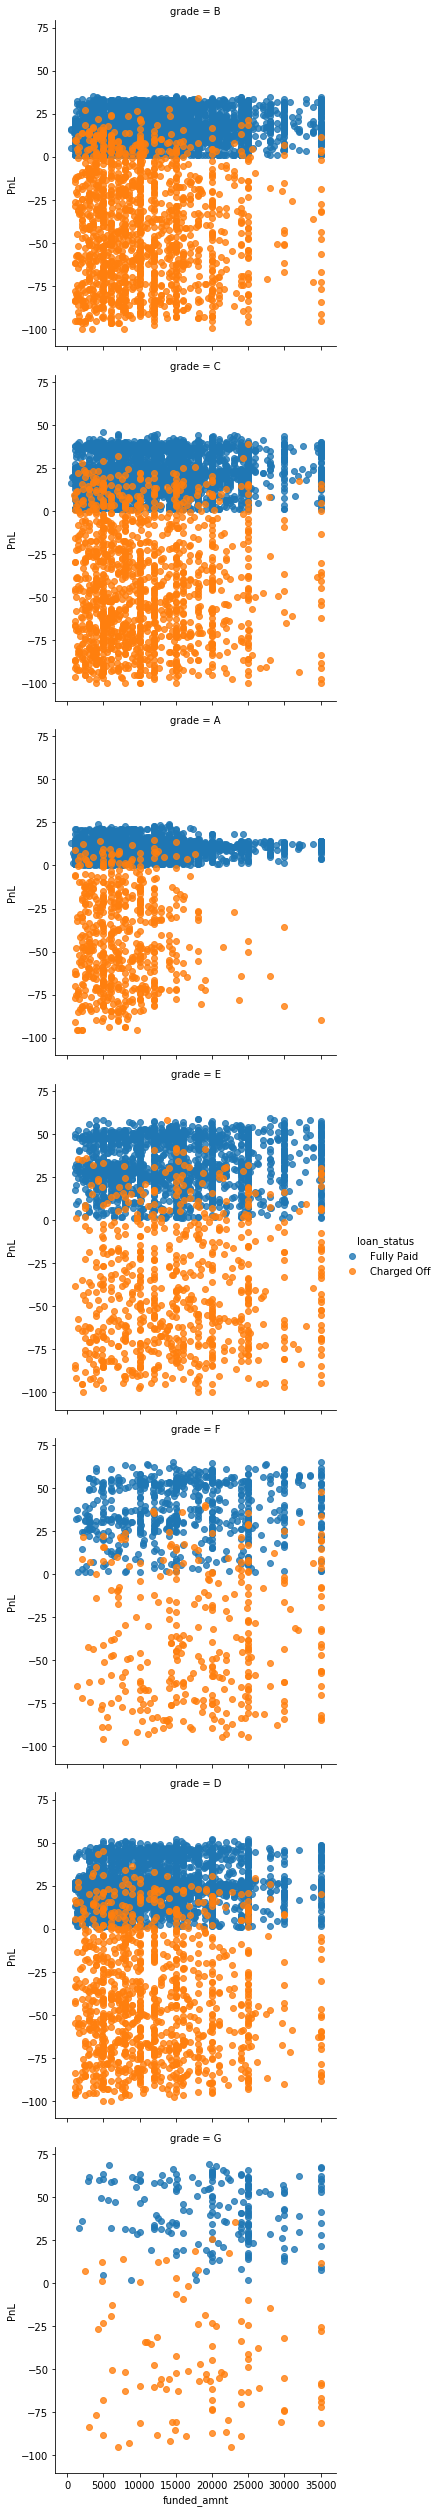

In [22]:
plt.figure(figsize=(15,15))

sns.lmplot(x='funded_amnt',y='PnL',hue='loan_status',row='grade',fit_reg=False,data=loan_record_new)

plt.show()

<Figure size 1080x3240 with 0 Axes>

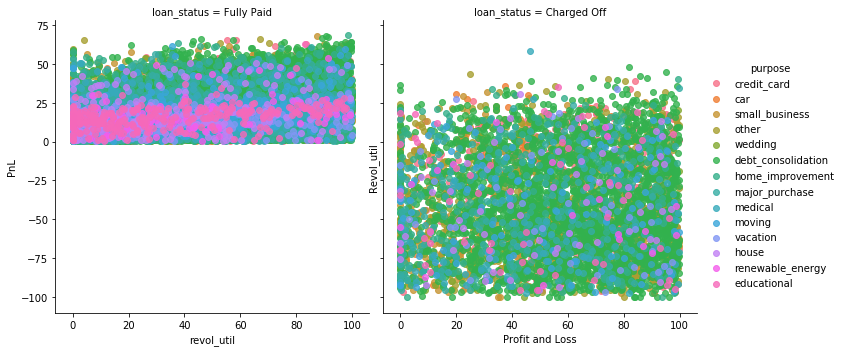

In [23]:
plt.figure(figsize=(15,45))


sns.lmplot(x='revol_util',y='PnL',col='loan_status',hue='purpose',fit_reg=False,data=loan_record_new)
plt.ylabel("Revol_util")
plt.xlabel("Profit and Loss")

plt.show()

In [24]:
# Profitibility v/s %age default for employment length


D1=loan_record_new.groupby(['emp_length','loan_status']).agg({'PnL':'count'})
D2=D1.groupby(level=0).apply(lambda x:round(x*100/x.sum(),1))

# Making a dataframe for default rate
default_purpose={'default_rate':{}}

for name in loan_record_new.emp_length.dropna().unique():
    default_purpose['default_rate'][name]=D2['PnL'][name]['Charged Off']
D2=pd.DataFrame(default_purpose)

# combining default dataframe with median & mad
D1=loan_record_new.groupby(['emp_length']).agg({'PnL':['median','mad']})

D3=pd.merge(D1['PnL'],D2,left_index=True,right_index=True,how='inner')

print(D3.sort_values('default_rate'))

D4=loan_record_new.groupby(['emp_length','grade']).agg({'PnL':'median'})

median_profitability={}

for name in loan_record_new.emp_length.dropna().unique():
    median_profitability[name]={}
    for gr in loan_record_new.grade.dropna().unique():
        try:  
            median_profitability[name][gr]=D4['PnL'][name][gr]
        except:
            median_profitability[name][gr]=pd.NaT
print(pd.DataFrame(median_profitability))

            median        mad  default_rate
emp_length                                 
9 years     14.375  15.030799          12.9
2 years     15.380  15.369247          13.2
3 years     15.025  15.589375          13.8
4 years     14.360  16.166513          13.8
8 years     13.920  15.244760          14.1
6 years     15.105  16.634692          14.2
< 1 year    14.380  16.049090          14.2
5 years     14.795  15.858263          14.3
1 year      14.980  16.250998          14.4
7 years     14.890  17.129002          15.4
10+ years   14.380  17.001842          15.7
   10+ years  < 1 year  3 years  8 years  9 years  4 years  5 years  1 year  \
B      16.50    16.160   16.465   15.990   16.785   15.960   16.365   16.04   
C      20.85    20.125   20.500   20.070   20.750   20.860   20.850   20.28   
A       9.95    10.410   10.180   10.455   10.035   10.520   10.175   10.43   
E      27.20    26.010   26.090   25.300   27.820   26.070   27.155   25.30   
F      28.82    31.130   30.415  

In [25]:
# Profitibility v/s Percentage default for Purpose


D1=loan_record_new.groupby(['purpose','loan_status']).agg({'PnL':'count'})
D2=D1.groupby(level=0).apply(lambda x:round(x*100/x.sum(),1))

#Making a dataframe for default rate
default_purpose={'default_rate':{}}

for name in loan_record_new.purpose.dropna().unique():
    default_purpose['default_rate'][name]=D2['PnL'][name]['Charged Off']
D2=pd.DataFrame(default_purpose)

# Combining default dataframe with median & mad
D1=loan_record_new.groupby(['purpose']).agg({'PnL':['median','mad']})

D3=pd.merge(D1['PnL'],D2,left_index=True,right_index=True,how='inner').sort_values('default_rate')

print(D3)

D4=loan_record_new.groupby(['purpose','grade']).agg({'PnL':'median'})
#print(D4)
median_profitability={}

for name in loan_record_new.purpose.dropna().unique():
    median_profitability[name]={}
    for gr in loan_record_new.grade.dropna().unique():
        try:  
            median_profitability[name][gr]=D4['PnL'][name][gr]
        except:
            median_profitability[name][gr]=pd.NaT
print(pd.DataFrame(median_profitability))

D1=loan_record_new.groupby(['home_ownership','loan_status']).agg({'PnL':'count'})
D2=D1.groupby(level=0).apply(lambda x:round(x*100/x.sum(),1))

# Making a dataframe for default rate
default_purpose={'default_rate':{}}

for name in loan_record_new.home_ownership.dropna().unique():
    try:
        default_purpose['default_rate'][name]=D2['PnL'][name]['Charged Off']
    except:
        default_purpose['default_rate'][name]=pd.NaT
D2=pd.DataFrame(default_purpose)

# Combining default dataframe with median & mod

D1=loan_record_new.groupby(['home_ownership']).agg({'PnL':['median','mad']})

D3=pd.merge(D1['PnL'],D2,left_index=True,right_index=True,how='inner').sort_values('default_rate')

print(D3)

D4=loan_record_new.groupby(['home_ownership','grade']).agg({'PnL':'median'})
median_profitability={}

for name in loan_record_new.home_ownership.dropna().unique():
    median_profitability[name]={}
    for gr in loan_record_new.grade.dropna().unique():
        try:  
            median_profitability[name][gr]=D4['PnL'][name][gr]
        except:
            median_profitability[name][gr]=pd.NaT
print(pd.DataFrame(median_profitability))

                    median        mad  default_rate
purpose                                            
major_purchase      12.255  12.909845          10.3
wedding             15.200  13.647210          10.4
car                 12.390  12.225088          10.7
credit_card         15.080  12.707926          10.8
home_improvement    13.510  14.745096          12.1
vacation            12.440  14.866476          14.1
debt_consolidation  15.580  16.987734          15.3
medical             12.610  18.353759          15.6
moving              13.630  17.068547          16.0
house               12.580  17.312434          16.1
other               14.050  17.663163          16.4
educational         15.040  16.716205          17.2
renewable_energy    12.040  18.473449          18.6
small_business      13.140  27.200605          27.1
   credit_card     car  small_business   other  wedding  debt_consolidation  \
B       16.190  16.450          15.370  16.450    16.16              16.170   
C       20

In [26]:
D1=loan_record_new.groupby(['addr_state','loan_status']).agg({'PnL':'count'})
D2=D1.groupby(level=0).apply(lambda x:round(x*100/x.sum(),1))

# Making a dataframe for default rate
default_purpose={'default_rate':{}}

for name in loan_record_new.addr_state.dropna().unique():
    try:
        default_purpose['default_rate'][name]=D2['PnL'][name]['Charged Off']
    except:
        default_purpose['default_rate'][name]=pd.NaT
        
D2=pd.DataFrame(default_purpose)

# Combining default dataframe with median & mad
D1=loan_record_new.groupby(['addr_state']).agg({'PnL':['median','mad']})

D3=pd.merge(D1['PnL'],D2,left_index=True,right_index=True,how='inner').sort_values('default_rate')

print(D3)

D4=loan_record_new.groupby(['addr_state','grade']).agg({'PnL':'median'})
median_profitability={}

for name in loan_record_new.addr_state.dropna().unique():
    median_profitability[name]={}
    for gr in loan_record_new.grade.dropna().unique():
        try:  
            median_profitability[name][gr]=D4['PnL'][name][gr]
        except:
            median_profitability[name][gr]=pd.NaT
print(pd.DataFrame(median_profitability))

D1=loan_record_new.groupby(['verification_status','loan_status']).agg({'PnL':'count'})
D2=D1.groupby(level=0).apply(lambda x:round(x*100/x.sum(),1))

# Making a dataframe for default rate
default_purpose={'default_rate':{}}

for name in loan_record_new.verification_status.dropna().unique():
    try:
        default_purpose['default_rate'][name]=D2['PnL'][name]['Charged Off']
    except:
        default_purpose['default_rate'][name]=pd.NaT
        
D2=pd.DataFrame(default_purpose)

# Combining default dataframe with median & mad
D1=loan_record_new.groupby(['verification_status']).agg({'PnL':['median','mad']})

D3=pd.merge(D1['PnL'],D2,left_index=True,right_index=True,how='inner').sort_values('default_rate')

print(D3)

D4=loan_record_new.groupby(['verification_status','grade']).agg({'PnL':'median'})
median_profitability={}

for name in loan_record_new.verification_status.dropna().unique():
    median_profitability[name]={}
    for gr in loan_record_new.grade.dropna().unique():
        try:  
            median_profitability[name][gr]=D4['PnL'][name][gr]
        except:
            median_profitability[name][gr]=pd.NaT
print(pd.DataFrame(median_profitability))

            median        mad default_rate
addr_state                                
WY          16.770   9.343334            5
DC          15.970  10.993892          7.1
MS          17.500  14.312742         10.5
DE          15.960  14.351265         10.6
VT          13.830  14.917116         11.3
AR          13.790  13.851591         11.5
TN          15.240  11.130035         11.8
TX          15.010  14.308892         11.9
KS          14.310  14.546558         12.2
WV          16.260  15.188838         12.2
MA          14.170  14.284626         12.3
PA          14.425  14.378973         12.3
AL          15.010  13.936534         12.4
LA          14.620  13.836607         12.4
CO          14.275  14.393962         12.8
VA          14.620  14.185086         12.9
CT          14.310  15.168978         12.9
RI          13.890  13.831458         12.9
OH          15.440  15.966677         13.2
MT          12.690  15.262317         13.3
IL          15.395  15.273412         13.3
MN         

In [27]:
#loan_record_new['delinq_2yrs']=loan_record_new['delinq_2yrs'].astype('category')
D1=loan_record_new.groupby(['delinq_2yrs','loan_status']).agg({'PnL':'count'})
D2=D1.groupby(level=0).apply(lambda x:round(x*100/x.sum(),1))

#print(D1)
# Making a dataframe for default rate
default_purpose={'default_rate':{}}

for name in loan_record_new.delinq_2yrs.dropna().unique():
    try:
        default_purpose['default_rate'][name]=D2['PnL'][name]['Charged Off']
    except:
        default_purpose['default_rate'][name]=pd.NaT
        
D2=pd.DataFrame(default_purpose)

# Combining default dataframe with median & mad
D1=loan_record_new.groupby(['delinq_2yrs']).agg({'PnL':['median','mad']})

D3=pd.merge(D1['PnL'],D2,left_index=True,right_index=True,how='inner').sort_values('default_rate')

print(D3)

D4=loan_record_new.groupby(['delinq_2yrs','grade']).agg({'PnL':'median'})
median_profitability={}

for name in loan_record_new.delinq_2yrs.dropna().unique():
    median_profitability[name]={}
    for gr in loan_record_new.grade.dropna().unique():
        try:  
            median_profitability[name][gr]=D4['PnL'][name][gr]
        except:
            median_profitability[name][gr]=pd.NaT
print(pd.DataFrame(median_profitability))


D1=loan_record_new.groupby(['delinq_2yrs','loan_status']).agg({'PnL':'count'})
D2=D1.groupby(level=0).apply(lambda x:round(x*100/x.sum(),1))

#print(D1)
# Making a dataframe for default rate
default_purpose={'default_rate':{}}

for name in loan_record_new.pub_rec_bankruptcies.dropna().unique():
    try:
        default_purpose['default_rate'][name]=D2['PnL'][name]['Charged Off']
    except:
        default_purpose['default_rate'][name]=pd.NaT
        
D2=pd.DataFrame(default_purpose)

# Combining default dataframe with median & mod
D1=loan_record_new.groupby(['pub_rec_bankruptcies']).agg({'PnL':['median','mad']})

D3=pd.merge(D1['PnL'],D2,left_index=True,right_index=True,how='inner').sort_values('default_rate')

print(D3)

D4=loan_record_new.groupby(['pub_rec_bankruptcies','grade']).agg({'PnL':'median'})
median_profitability={}

for name in loan_record_new.pub_rec_bankruptcies.dropna().unique():
    median_profitability[name]={}
    for gr in loan_record_new.grade.dropna().unique():
        try:  
            median_profitability[name][gr]=D4['PnL'][name][gr]
        except:
            median_profitability[name][gr]=pd.NaT
print(pd.DataFrame(median_profitability))

             median        mad default_rate
delinq_2yrs                                
6            19.420  15.116400           10
5            21.400  16.176009         14.3
0            14.280  16.022047         14.4
1            17.420  17.945354         15.8
3            20.100  20.767530         16.5
2            18.050  20.026794         19.3
4            22.270  23.638444         21.7
7            24.805  43.492500           25
8           -28.195  43.675000           50
9            24.420   0.000000          NaT
11           17.420   0.000000          NaT
       0       2       3       1       4       6       5      8      7   \
B  16.160  15.880  13.660  16.400  18.050    9.22   11.79    NaT    NaT   
C  20.600  20.195  20.870  20.630  21.780   21.77    21.4    NaT  21.46   
A  10.240  11.030   9.875  10.870 -13.140     NaT     NaT    NaT    NaT   
E  26.480  18.150  31.260  26.890  28.815    30.7      28    NaT  -82.1   
F  28.430  27.120  29.790  26.505  37.360     NaT  -5

                median        mad  default_rate
inq_last_6mths                                 
0               14.020  13.858975          12.2
1               15.270  17.357608          15.7
4               12.000  17.903234          16.1
2               15.670  18.848462          16.7
5               11.570  21.337636          19.4
3               15.110  22.610933          20.8
8               15.055  24.074898          21.4
6               12.010  21.393495          25.4
7               13.175  26.166125          29.4
        1       5       2       3       0       4      6       7       8
B  16.150   13.06  16.020  15.605  16.470   15.62  13.98   12.25   -8.21
C  20.630   11.87  19.980  20.030  20.785   21.03   9.76   12.07   12.62
A  10.400   11.08  10.270  10.070  10.200   10.57  13.12   12.81     NaT
E  25.950  31.145  26.160  25.800  27.150  20.385  14.64     NaT  20.265
F  27.120   13.31  27.185  28.510  29.395   54.13    NaT   26.16   -8.69
D  23.095    19.4  22.690  21.710 

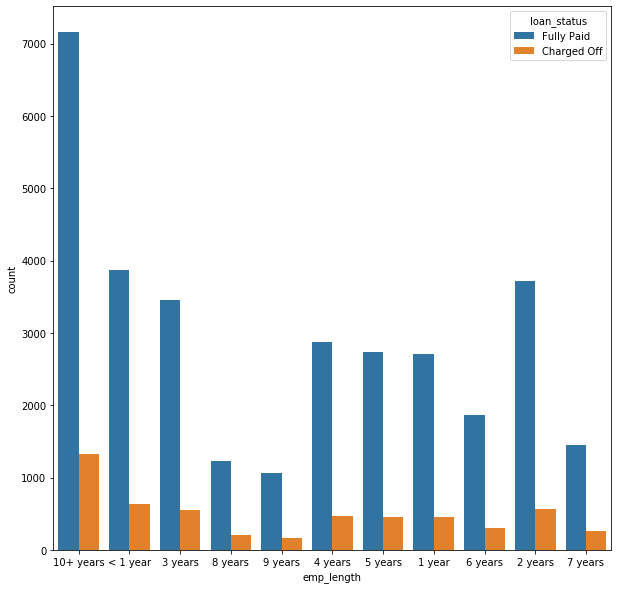

In [30]:
#loan_record_new['delinq_2yrs']=loan_record_new['delinq_2yrs'].astype('category')
D1=loan_record_new.groupby(['inq_last_6mths','loan_status']).agg({'PnL':'count'})
D2=D1.groupby(level=0).apply(lambda x:round(x*100/x.sum(),1))

#print(D1)
# Making a dataframe for default rate
default_purpose={'default_rate':{}}

for name in loan_record_new.inq_last_6mths.dropna().unique():
    try:
        default_purpose['default_rate'][name]=D2['PnL'][name]['Charged Off']
    except:
        default_purpose['default_rate'][name]=pd.NaT
        
D2=pd.DataFrame(default_purpose)

# Combining default dataframe with median & mad
D1=loan_record_new.groupby(['inq_last_6mths']).agg({'PnL':['median','mad']})

D3=pd.merge(D1['PnL'],D2,left_index=True,right_index=True,how='inner').sort_values('default_rate')

print(D3)

D4=loan_record_new.groupby(['inq_last_6mths','grade']).agg({'PnL':'median'})
median_profitability={}

for name in loan_record_new.inq_last_6mths.dropna().unique():
    median_profitability[name]={}
    for gr in loan_record_new.grade.dropna().unique():
        try:  
            median_profitability[name][gr]=D4['PnL'][name][gr]
        except:
            median_profitability[name][gr]=pd.NaT
print(pd.DataFrame(median_profitability))

drop_columns2=['installment','term','total_pymnt_inv','total_rec_prncp']

loan_record_new=loan_record_new.drop(drop_columns2,axis=1)



plt.figure(figsize=(10,10))
sns.countplot('emp_length',hue='loan_status',data=loan_record_new)

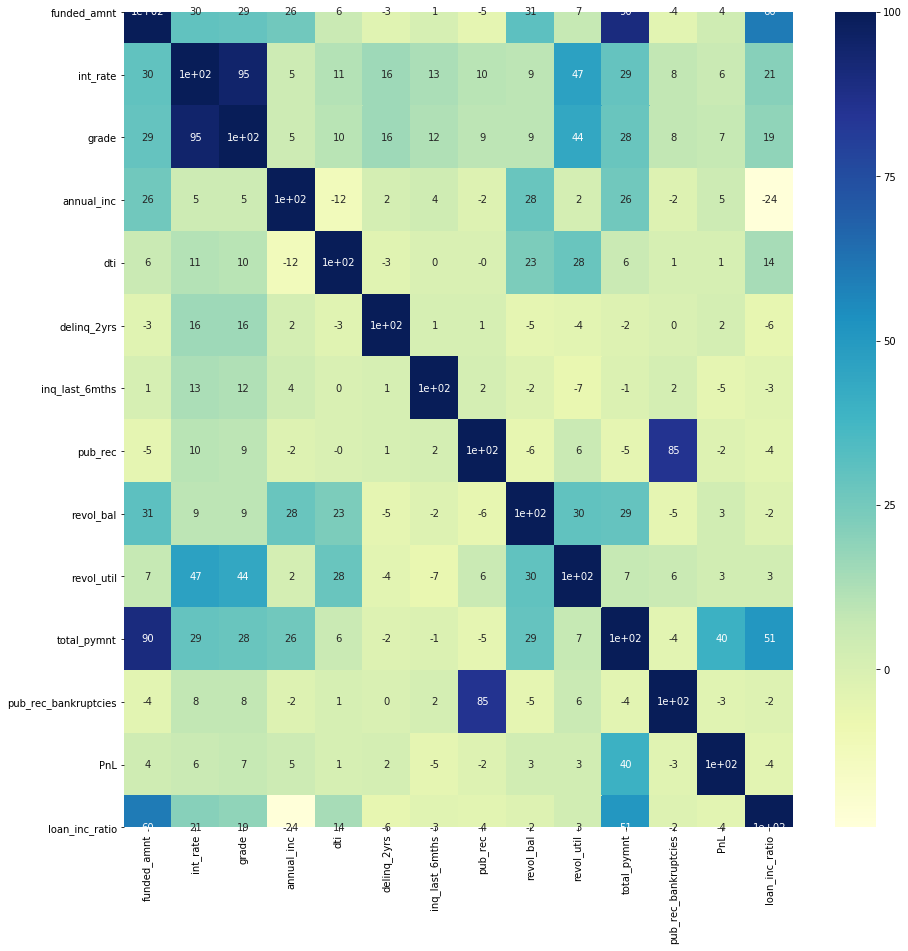

In [31]:
# Converting employment length into a nominal variable
mapping_dict = {
    "emp_length": {
        "10+ years": 10,
        "9 years": 9,
        "8 years": 8,
        "7 years": 7,
        "6 years": 6,
        "5 years": 5,
        "4 years": 4,
        "3 years": 3,
        "2 years": 2,
        "1 year": 1,
        "< 1 year": 0,
        "n/a": 0

    },
    "grade":{
        "A": 1,
        "B": 2,
        "C": 3,
        "D": 4,
        "E": 5,
        "F": 6,
        "G": 7
    }
}

loan_record_new=loan_record_new.replace(mapping_dict)

plt.figure(figsize=(15,15))
sns.heatmap(round(loan_record_new.corr()*100,0),annot=True,cmap="YlGnBu")
plt.show()

In [28]:
# Making bins for DTI,loan amount, revol_util

loan_record_new['funded_amnt_bins']=pd.cut(loan_record_new['funded_amnt'],7)
print(loan_record_new.groupby(['grade','funded_amnt_bins'])['PnL'].median())


loan_record_new['dti_bins']= pd.cut(loan_record_new['dti'],7)
print(loan_record_new.groupby(['grade','dti_bins'])['PnL'].median())


loan_record_new['revol_util_bins']= pd.cut(loan_record_new['revol_util'],7)
print(loan_record_new.groupby(['grade','revol_util_bins'])['PnL'].median())

grade  funded_amnt_bins      
A      (465.5, 5428.571]          9.810
       (5428.571, 10357.143]     10.380
       (10357.143, 15285.714]    10.310
       (15285.714, 20214.286]    10.760
       (20214.286, 25142.857]    10.970
       (25142.857, 30071.429]    11.255
       (30071.429, 35000.0]      12.350
B      (465.5, 5428.571]         16.080
       (5428.571, 10357.143]     16.150
       (10357.143, 15285.714]    16.420
       (15285.714, 20214.286]    16.770
       (20214.286, 25142.857]    16.320
       (25142.857, 30071.429]    17.260
       (30071.429, 35000.0]      16.490
C      (465.5, 5428.571]         20.480
       (5428.571, 10357.143]     20.480
       (10357.143, 15285.714]    20.650
       (15285.714, 20214.286]    20.810
       (20214.286, 25142.857]    20.850
       (25142.857, 30071.429]    24.590
       (30071.429, 35000.0]      21.130
D      (465.5, 5428.571]         23.220
       (5428.571, 10357.143]     23.220
       (10357.143, 15285.714]    23.760
       (15

<Figure size 3240x3240 with 0 Axes>

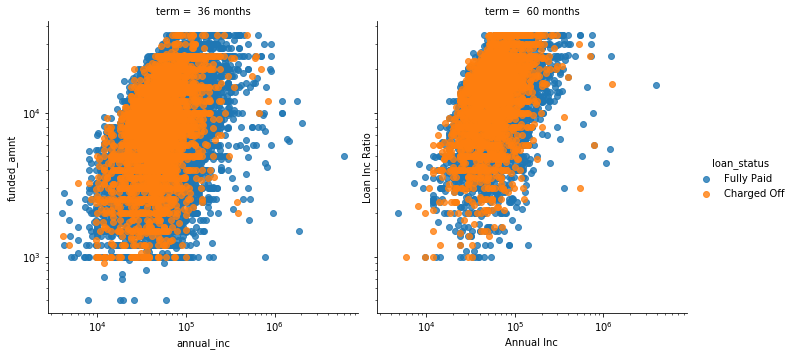

Index(['funded_amnt', 'term', 'int_rate', 'installment', 'grade', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'loan_status',
       'purpose', 'addr_state', 'dti', 'delinq_2yrs', 'inq_last_6mths',
       'pub_rec', 'revol_bal', 'revol_util', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'pub_rec_bankruptcies', 'PnL', 'loan_inc_ratio',
       'funded_amnt_bins', 'dti_bins', 'revol_util_bins'],
      dtype='object')

In [29]:
#Visualizing

loan_record_new.corr()
plt.figure(figsize=(45,45))


fgrid=sns.lmplot(y='funded_amnt',x='annual_inc',fit_reg=False,hue='loan_status',col='term',data=loan_record_new)
ax=fgrid.axes[0][0]
plt.xscale('log')
plt.yscale('log')
plt.ylabel("Loan Inc Ratio")
plt.xlabel("Annual Inc")

plt.show()

loan_record_new.columns